training score : 0.995 (multinomial)


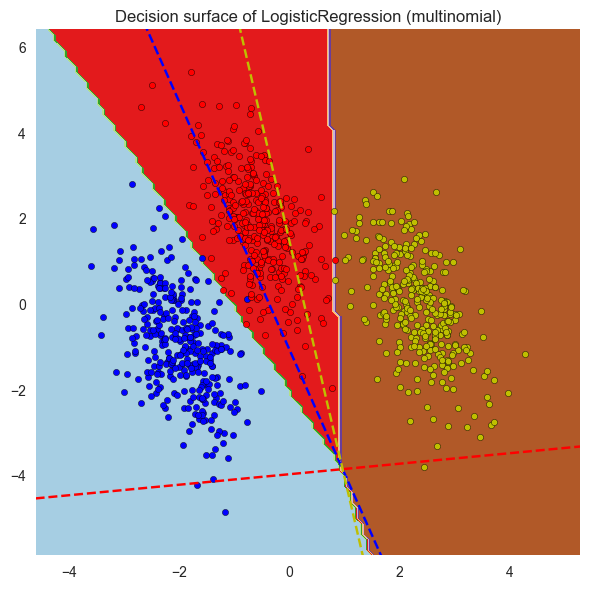

training score : 0.976 (ovr)


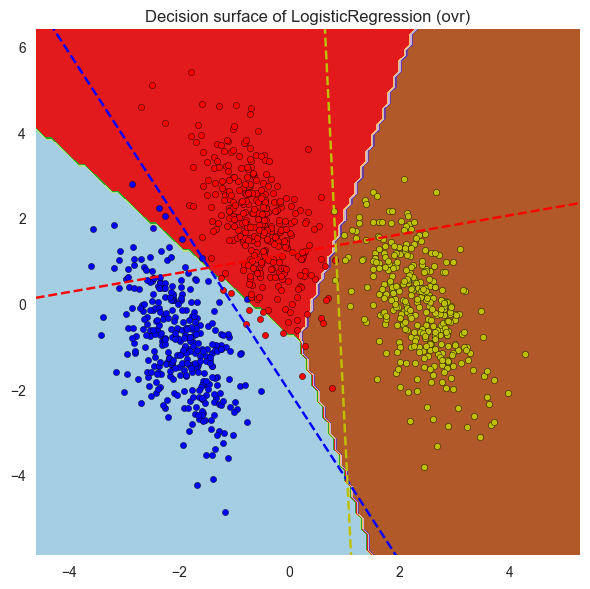

In [13]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入logistic回归模型
from sklearn.linear_model import LogisticRegression
# 导入分类数据集生成工具
from sklearn.datasets import make_blobs
# 导入决策边界可视化工具
from sklearn.inspection import DecisionBoundaryDisplay
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 三个类别的中心
centers = [[-5, 0], [0, 1.5], [5, -1]]
# 生成数据集
X, y = make_blobs(
    n_samples=1000, 
    n_features=2,
    centers=centers, 
    random_state=40
)
# 两个特征，所以是两个维度
transformation = [[0.4, 0.2], [-0.4, 1.2]]
# X做一个转换
X = np.dot(X, transformation)
# 在两个方法下绘图
for multi_class,num in zip(["multinomial", "ovr"], [25, 26]):
    # 建立Logistic回归模型
    clf = LogisticRegression(
        solver="sag", 
        max_iter=100, 
        random_state=42, 
        multi_class=multi_class
    )
    # 模型拟合
    clf.fit(X, y)
    # 训练集的分类准确率
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))
    # 开始绘图
    fig, ax = plt.subplots(figsize=(6,6), tight_layout=True)
    # 绘制决策边界图
    DecisionBoundaryDisplay.from_estimator(
        clf, # 模型
        X, # X
        response_method="predict", # 预测
        cmap=plt.cm.Paired, # 颜色
        ax=ax # 图形
    )
    ax.set_title("Decision surface of LogisticRegression (%s)" % multi_class)
    # 绘制训练集的散点
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        # 散点
        ax.scatter(
            X[idx, 0], X[idx, 1], 
            c=color, 
            edgecolor="black", 
            s=20
        )
    # 绘制ovr分类边界
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # 获取系数和偏置
    coef = clf.coef_
    intercept = clf.intercept_
    # 绘制超平面的函数
    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        ax.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
    # 绘制超平面
    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

    plt.show()
    fig.savefig("../codeimage/code{}.pdf".format(num))